# Bibliometric Analysis
## Based on Zotero CSV export

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime

Loading libraries

In [1]:
import pandas as pd

Loading data (exported from Zotero as CSV)

In [2]:
df = pd.read_csv('Artificial Intelligence in Aviation Maintenance.csv')

Renaming for easier plots/summaries

In [3]:
df = df.rename(columns={"Item Type": "Publication Type"})
df['Manual Tags'] = df['Manual Tags'].apply(lambda x: [tag.strip() for tag in x.split(';')] if isinstance(x, str) else [])
df['Publication Type'] = df['Publication Type'].replace('bookSection', 'Book Section').replace('conferencePaper', 'Conference Paper').replace('journalArticle', 'Journal Article')

Data preview

In [4]:
df[["Publication Type","Publication Year","Author","Title","Publication Title","Conference Name","Manual Tags"]]

,Publication Type,Publication Year,Author,Title,Publication Title,Conference Name,Manual Tags
0,Journal Article,2021,"Chen, C.; Lu, N.; Jiang, B.; Xing, Y.; Zhu, Z.H.",Prediction Interval Estimation of Aeroengine R...,IEEE Transactions on Instrumentation and Measu...,NaN,"[2. ML, 2.2. Deep Learning, 2.2.3. RNN, 2.2.3...."
1,Conference Paper,2018,"Liao, Y.; Zhang, L.; Liu, C.",Uncertainty Prediction of Remaining Useful Lif...,NaN,2018 IEEE International Conference on Prognost...,"[2. ML, 2.2. Deep Learning, 2.2.3. RNN, 2.2.3...."
2,Journal Article,2014,"Xu, Q.",Impact detection and location for a plate stru...,Structural Health Monitoring,NaN,"[cited, 2.1.2. SVM, 2.1. Conventional ML, 2. M..."
3,Journal Article,2000,"Brotherton, T.; Jahns, G.; Jacobs, J.; Wroblew...",Prognosis of faults in gas turbine engines,IEEE Aerospace Conference Proceedings,NaN,"[2. ML, 2.1. Conventional ML, 2.1.1. FFNN, 4. ..."
4,Journal Article,2019,"Ordóñez, C.; Sánchez Lasheras, F.; Roca-Pardiñ...",A hybrid ARIMA–SVM model for the study of the ...,Journal of Computational and Applied Mathematics,NaN,"[2. ML, 2.1. Conventional ML, 2.1.2. SVM, 4. C..."
...,...,...,...,...,...,...,...
652,Journal Article,2024,C. Wang; H. Chen; Y. Wang; S. Zhao; K. Liu,Spatial Contrast and Semantic Difference Perce...,IEEE Transactions on Aerospace and Electronic ...,NaN,"[2.2. Deep Learning, 2. ML, 5. MRO, 5.2. Failu..."
653,Conference Paper,2024,C. Karpagavalli; N. A; R. Raja; S. E; M. E. M....,Incorporating Transfer Learning in Engine Heal...,2024 3rd International Conference on Sentiment...,2024 3rd International Conference on Sentiment...,"[2. ML, 2.2. Deep Learning, 2.2.7. Transfer Le..."
654,Conference Paper,2024,"Boujamza, A.; Elhaq, S.L.",Optimizing Remaining Useful Life Predictions f...,NaN,IFAC-PapersOnLine,"[2. ML, 2.2. Deep Learning, 2.2.3. RNN, 6. Hea..."
655,Conference Paper,2024,"Barry, I.; Hafsi, M.; Qaisar, S.M.",Boosting Regression Assistive Predictive Maint...,NaN,Lecture Notes in Networks and Systems,"[2. ML, 2.2. Deep Learning, 2.2.8. Ensemble, 2..."


## Publication Dynamics

Manual adjustment of the incomplete last year

In [5]:
year_item_counts = df.groupby(['Publication Year', 'Publication Type']).size().unstack(fill_value=0)
year_item_counts_adjusted = year_item_counts.copy()
if 2024 in year_item_counts_adjusted.index:
    year_item_counts_adjusted.loc[2024] = np.round(year_item_counts_adjusted.loc[2024] * 365/294) #21-Oct

Plotting the dynamics

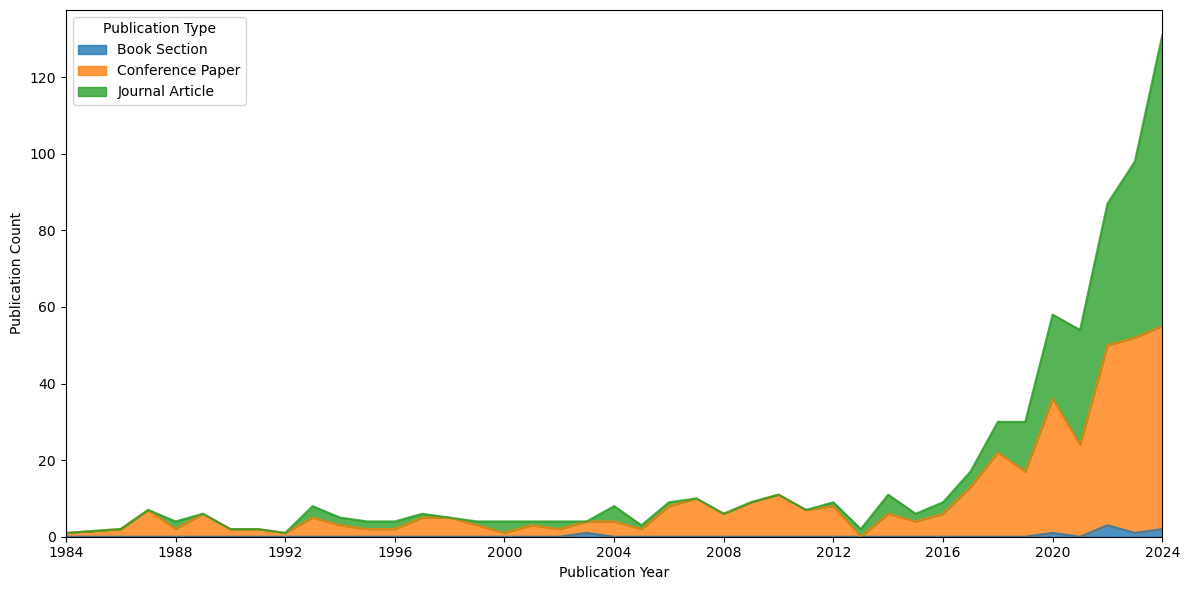

In [6]:
year_item_counts_adjusted.plot(kind='area', stacked=True, alpha=0.8, figsize=(12, 6))
plt.xlabel('Publication Year')
plt.ylabel('Publication Count')
plt.xlim(1984, 2024)
plt.xticks(range(1984, 2025,4))
plt.legend(title='Publication Type')
plt.tight_layout()
plt.show();

## Most cited papers

Collecting citations using Open REST API for COCI, the OpenCitations Index of Crossref

In [7]:
def get_citation_count(doi):
    base_url = "https://opencitations.net/index/coci/api/v1/citations/"
    url = f"{base_url}{doi}"
    if (pd.isna(doi)):
        return np.nan
    try:
        response = requests.get(url)
        response.raise_for_status()
        citations = response.json()
        citation_count = len(citations)
        print(".", end="")
        return citation_count
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return np.nan
df['CitationCount'] = df['DOI'].apply(get_citation_count)

..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Plotting citation counts

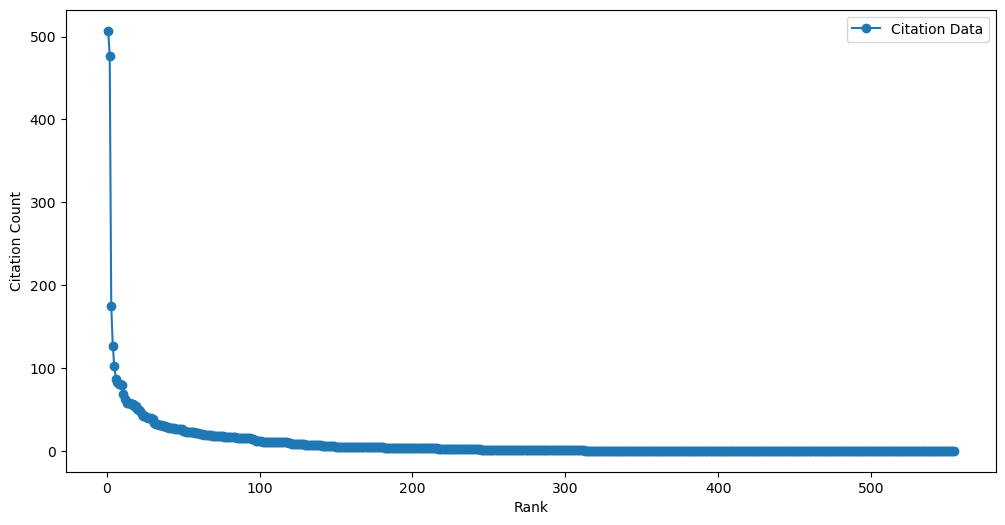

In [8]:
df = df.sort_values(by="CitationCount", ascending=False)
df['Rank'] = range(1, len(df) + 1)

plt.figure(figsize=(12, 6))
plt.plot(df['Rank'], df['CitationCount'], marker='o', label='Citation Data')
plt.xlabel("Rank")
plt.ylabel("Citation Count")
plt.legend()
plt.show()

Top 10 most cited papers

In [9]:
pd.set_option('display.max_colwidth', None)
df[["Author","Title","Publication Year","Publication Title","CitationCount"]].head(10)

,Author,Title,Publication Year,Publication Title,CitationCount
36,"Wu, Y.; Yuan, M.; Dong, S.; Lin, L.; Liu, Y.",Remaining useful life estimation of engineered systems using vanilla LSTM neural networks,2018,Neurocomputing,507.0
6,"Tamilselvan, P.; Wang, P.",Failure diagnosis using deep belief learning based health state classification,2013,Reliability Engineering and System Safety,477.0
14,"Yuan, M.; Wu, Y.; Lin, L.",Fault diagnosis and remaining useful life estimation of aero engine using LSTM neural network,2016,NaN,175.0
4,"Ordóñez, C.; Sánchez Lasheras, F.; Roca-Pardiñas, J.; Juez, F.J.D.C.",A hybrid ARIMA–SVM model for the study of the remaining useful life of aircraft engines,2019,Journal of Computational and Applied Mathematics,127.0
23,"Siyaev, A.; Jo, G.-S.",Towards aircraft maintenance metaverse using speech interactions with virtual objects in mixed reality,2021,Sensors,102.0
33,"Peng, K.; Jiao, R.; Dong, J.; Pi, Y.",A deep belief network based health indicator construction and remaining useful life prediction using improved particle filter,2019,Neurocomputing,87.0
13,"Iannace, G.; Ciaburro, G.; Trematerra, A.",Fault diagnosis for UAV blades using artificial neural network,2019,Robotics,83.0
21,"Joly, R.B.; Ogaji, S.O.T.; Singh, R.; Probert, S.D.",Gas-turbine diagnostics using artificial neural-networks for a high bypass ratio military turbofan engine,2004,Applied Energy,80.0
40,"Xiang, S.; Qin, Y.; Luo, J.; Pu, H.; Tang, B.",Multicellular LSTM-based deep learning model for aero-engine remaining useful life prediction,2021,Reliability Engineering and System Safety,80.0
28,"Feng, K.; Ji, J.C.; Zhang, Y.; Ni, Q.; Liu, Z.; Beer, M.",Digital twin-driven intelligent assessment of gear surface degradation,2023,Mechanical Systems and Signal Processing,79.0


## Most popular journals and conferences

Most popular journals - overall and last 5 years

In [10]:
top = 20
title = "Publication Title"
pd.merge(df[title].value_counts().reset_index(), 
         df.loc[df["Publication Year"] >= datetime.datetime.now().year-5,title].value_counts().reset_index(),
         on=title, how='outer').head(top)

,Publication Title,count_x,count_y
0,Reliability Engineering and System Safety,13,11.0
1,IEEE Access,13,13.0
2,Applied Sciences (Switzerland),10,10.0
3,Aerospace,8,8.0
4,IEEE Sensors Journal,6,5.0
5,Mechanical Systems and Signal Processing,6,6.0
6,Expert Systems with Applications,6,5.0
7,Measurement Science and Technology,6,6.0
8,IEEE Transactions on Instrumentation and Measurement,6,6.0
9,Sensors,5,5.0


Making conference titles consistent

In [11]:
title = "Conference Name"
df[title] = df[title].where(~df[title].str.contains('IWSHM', case=False, na=False), 'IWSHM')
df[title] = df[title].where(~df[title].str.contains('AIAA SciTech Forum', case=False, na=False), 'AIAA SciTech Forum')
df[title] = df[title].str.replace('Proceedings - ', '').str.replace('(Proceedings)', '').str.replace('Proceedings of ', '').\
    str.replace('Proceedings', '').str.replace(r'\b\d{4}\b', '', regex=True).str.replace(r'\b\d{1,2}(st|nd|rd|th)\b', '', regex=True).\
    str.replace('the ', '').str.strip()

Most popular conferences - overall and last 5 years

In [12]:
pd.merge(df[title].value_counts().reset_index(), 
         df.loc[df["Publication Year"] >= datetime.datetime.now().year-5,title].value_counts().reset_index(),
         on=title, how='outer').head(top)

,Conference Name,count_x,count_y
0,SPIE - The International Society for Optical Engineering,18,14.0
1,AUTOTESTCON,11,NaN
2,ASME Turbo Expo,10,4.0
3,IEEE Aerospace Conference,10,1.0
4,"Annual Conference of Prognostics and Health Management Society, PHM",6,5.0
5,ACM International Conference Proceeding Series,6,5.0
6,Annual Reliability and Maintainability Symposium,6,3.0
7,"IEEE International Conference on Prognostics and Health Management, ICPHM",6,3.0
8,AIAA Scitech Forum,5,5.0
9,IWSHM,5,1.0


# Manual Tag Analysis

Counting manual tags by years

In [13]:
exploded_df = df.explode('Manual Tags')
tag_counts_by_year = exploded_df.groupby(['Publication Year', 'Manual Tags']).size().unstack(fill_value=0)
tag_counts_by_year_adjusted = tag_counts_by_year.copy()


Adjusting the incomplete year

In [14]:
if 2024 in tag_counts_by_year_adjusted.index:
    tag_counts_by_year_adjusted.loc[2024] = np.round(tag_counts_by_year_adjusted.loc[2024] * 365/294)
all_years = pd.DataFrame(index=range(1984, 2024))
tag_counts_by_year_adjusted = all_years.join(tag_counts_by_year_adjusted, how='outer').fillna(0)

### AI-related tag group

Plotting the dynamics

<Figure size 1200x600 with 0 Axes>

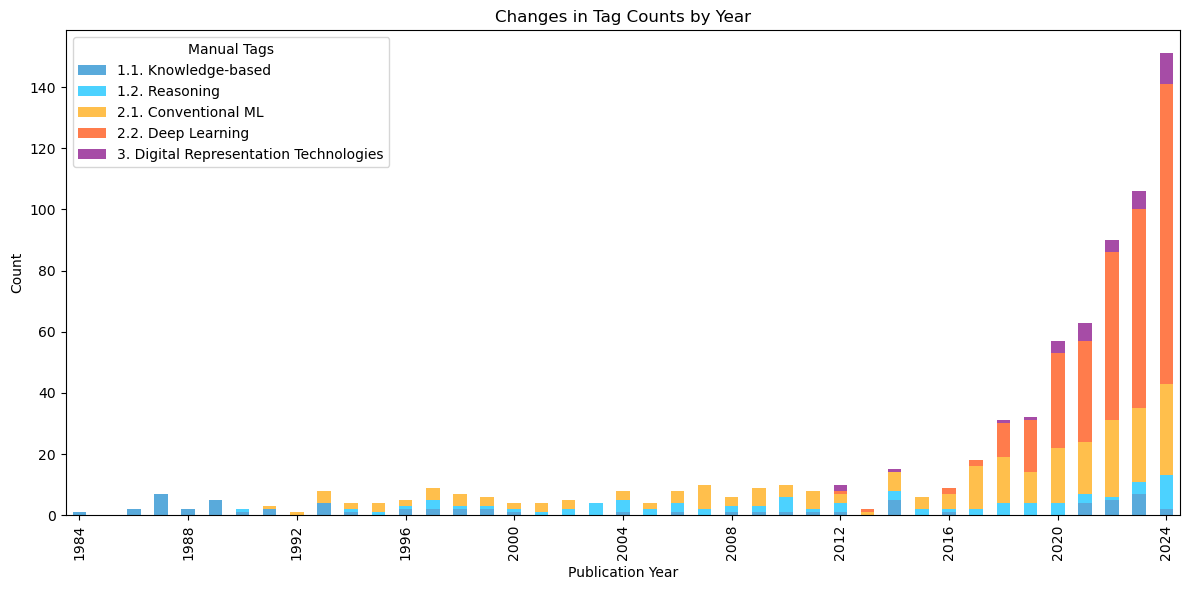

In [15]:
AI_areas = ['1.1. Knowledge-based', '1.2. Reasoning','2.1. Conventional ML','2.2. Deep Learning', '3. Digital Representation Technologies']
filtered_tag_counts_by_year = tag_counts_by_year_adjusted[AI_areas]
colors = ['#1386CC', '#00BFFF', '#FFA500', '#FF4500', '#800080'] 
plt.figure(figsize=(12, 6))

filtered_tag_counts_by_year.plot(kind='bar', stacked=True, color=colors, figsize=(12, 6), alpha=0.7)

plt.title('Changes in Tag Counts by Year')
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.legend(title='Manual Tags', loc='upper left') 
plt.grid()
plt.xticks(ticks=range(len(filtered_tag_counts_by_year.index)), 
           labels=filtered_tag_counts_by_year.index)
plt.gca().set_xticks(plt.gca().get_xticks()[::4])
plt.grid(False)
plt.tight_layout()
plt.show()

AI Tag Hierarchy

In [16]:
tag_counts_by_year_adjustedAI = tag_counts_by_year_adjusted.loc[:, tag_counts_by_year_adjusted.columns.str.startswith(('1', '2', '3'))]
tag_sums = tag_counts_by_year_adjustedAI.sum()
tag_sums = pd.concat([pd.Series([len(df)], index=["AI in Aviation Maintenance"]), tag_sums])
tag_sums

AI in Aviation Maintenance                657.0
1. Logic/Knowledge                        148.0
1.1. Knowledge-based                       65.0
1.1.1. Expert systems                      28.0
1.1.2. Semantic Models                      3.0
1.2. Reasoning                             80.0
1.2.1. Case-based Reasoning                13.0
1.2.2. Bayesian Reasoning                  26.0
1.2.2.1. Bayesian Belief Network            3.0
1.2.3. Fuzzy Logic                         30.0
1.2.4. Markov Models                        8.0
2. ML                                     537.0
2.1. Conventional ML                      240.0
2.1.1. FFNN                               132.0
2.1.2. SVM                                 43.0
2.1.3. Random Forest                       14.0
2.1.4. Decision Tree                       16.0
2.1.5. SOM                                  6.0
2.2. Deep Learning                        316.0
2.2.1. CNN                                101.0
2.2.1.1. YOLO                           

In [17]:
from plotly.colors import qualitative
import plotly.graph_objects as go
import plotly.colors as colors
import re

hierarchy = {
    'AI in Aviation Maintenance': {
        '1. Logic/Knowledge': {
            '1.1. Knowledge-based': [
                '1.1.1. Expert systems'
            ],
            '1.2. Reasoning': {
                '1.2.1. Case-based Reasoning': [],
                '1.2.2. Bayesian Reasoning': [],
                '1.2.3. Fuzzy Logic': [],
                '1.2.4. Markov Models': []
            }
        },
        '2. ML': {
            '2.1. Conventional ML': [
                '2.1.1. FFNN',
                '2.1.2. SVM',
                '2.1.3. Random Forest',
                '2.1.4. Decision Tree',
                '2.1.5. SOM'
            ],
            '2.2. Deep Learning': {
                '2.2.1. CNN': [
                    '2.2.1.1. YOLO'
                ],
                '2.2.2. GAN': [],
                '2.2.3. RNN': [
                    '2.2.3.1. LSTM',
                    '2.2.3.2. GRU'
                ],
                '2.2.4. DBN': [],
                '2.2.5. Autoencoder': [],
                '2.2.6. Transformer': [],
                '2.2.7. Transfer Learning': [],
                '2.2.8. Ensemble': [
                    '2.2.8.1. Boosting'
                ]
    },
            '2.3. Reinforcement': []
        },
        '3. Digital Representation Technologies': {
            '3.1. Augmented Reality': [],
            '3.2. Digital Twin': []
        }
    }
}

sources = []
targets = []
values = []

def format_node(s,tag_sums):
    return re.sub(r'^\d+(\.\d+)*\.?\s*', '', s)+" ("+str(int(tag_sums[s]))+")"
def generate_pairs(source, sublevels):
    for sublevel, items in sublevels.items():
        sources.append(format_node(source, tag_sums))
        targets.append(format_node(sublevel, tag_sums))
        values.append(tag_sums[sublevel])
        if isinstance(items, list):
            for item in items:
                sources.append(format_node(sublevel, tag_sums))
                targets.append(format_node(item, tag_sums))
                values.append(tag_sums[item])
        elif isinstance(items, dict):
            generate_pairs(sublevel, items)

for main_level, subcategories in hierarchy.items():
    generate_pairs(main_level, subcategories)

sankey_df = pd.DataFrame({
    'Source': sources,
    'Target': targets,
    'Value': values
})

unique_labels = [format_node(s,tag_sums) for s in tag_sums.index.tolist()]
label_to_index = {label: index for index, label in enumerate(unique_labels)}

sankey_source_indices = [label_to_index[src] for src in sources]
sankey_target_indices = [label_to_index[tgt] for tgt in targets]
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=unique_labels,
    x=[0,#'AI-related papers in Aviation Maintenance',
        1/4,#'1. Logic/Knowledge',
        2/4,#'1.1. Knowledge-based',
        3/4,#'1.1.1. Expert systems',
         2/4,#'1.2. Reasoning',
         3/4,#'1.2.1. Case-based Reasoning',
         3/4,#'1.2.2. Bayesian Reasoning',
         3/4,#'1.2.3. Fuzzy Logic',
         3/4,#'1.2.4. Markov Models',
              1/4,#'2. ML',
             2/4,#'2.1. Conventional Machine Learning',
             3/4,#'2.1.1. FFNN',
             3/4,#'2.1.2. SVM',
             3/4,#'2.1.3. Random Forest',
             3/4,#'2.1.4. Decision Tree',
             3/4,#'2.1.5. SOM',
             2/4,#'2.2. Deep Learning',
             3/4,#'2.2.1. CNN',
              4/4,#'2.2.1.1. YOLO',
             3/4,#'2.2.2. GAN',
             3/4,#'2.2.3. RNN',
                        4/4,#'2.2.3.1. LSTM',
              4/4,#'2.2.3.2. GRU',
             3/4,#'2.2.4. DBN',
             3/4,#'2.2.5. Autoencoder',
             3/4,#'2.2.6. Transformer',
             3/4,#'2.2.7. Transfer Learning',
             3/4,#'2.2.8. Ensemble',
              4/4,#'2.2.8.1. Boosting',
             2/4,#'2.3. Reinforcement',
             1/4,#'3. Digital Representation Technologies',
             2/4,#'3.1. Augmented Reality',
             2/4,#'3.2. Digital Twin'
           ],
        y=[x/len(unique_labels) for x in range(0, len(unique_labels))],
        color= colors.sample_colorscale('Plasma', [i/(len(unique_labels) - 1) for i in range(len(unique_labels))])
    ),
    link=dict(
        source=sankey_source_indices,  # Indices correspond to labels
        target=sankey_target_indices,
        color="#DEDEDE",
        value=values
    ),
    arrangement = "snap"
))

# Customize the layout
fig.update_layout(font=dict(size=24, color='black'), 
                   width=2000, height=1200)
fig.show(renderer='browser')

### AM-related tag group

Plotting the dynamics

<Figure size 1200x600 with 0 Axes>

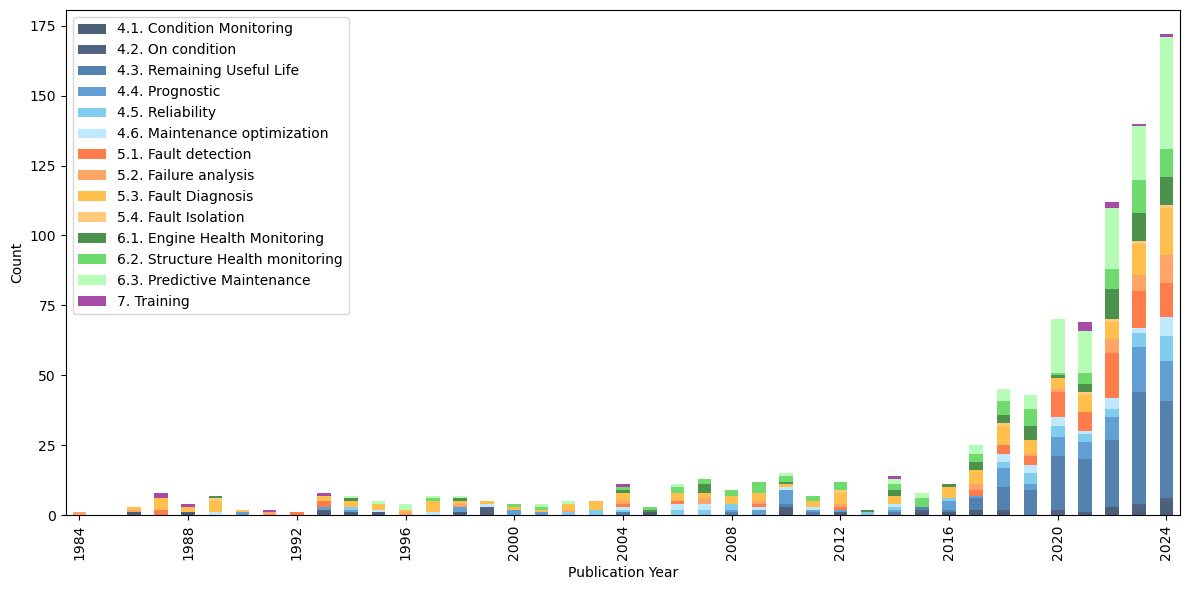

In [18]:
AM_areas = ['4.1. Condition Monitoring','4.2. On condition',
                                                           '4.3. Remaining Useful Life',
                                                           '4.4. Prognostic',
                                                           '4.5. Reliability',
                                                           '4.6. Maintenance optimization',
                                                           '5.1. Fault detection', 
                                                           '5.2. Failure analysis', 
                                                           '5.3. Fault Diagnosis', 
                                                           '5.4. Fault Isolation', 
                                                           '6.1. Engine Health Monitoring',
                                                           '6.2. Structure Health monitoring',
                                                           '6.3. Predictive Maintenance',
                                                           '7. Training']
filtered_tag_counts_by_year = tag_counts_by_year_adjusted[AM_areas]
cls = [
    '#001D3D',  # Almost black navy blue
    '#0A1E4E',  # Very deep blue
    '#0A4D8C',  # Deep blue
    '#1F76C2',  # Bright, vibrant blue
    '#4CB8E6',  # Light azure blue
    '#A6E1FF',  # Very pale blue
    
    '#FF4500',
    '#FF7F24',
    '#FFA500',
    '#FFB347',
    
    '#006400',  # Dark Green
    '#32CD32',  # Lime Green
    '#98FB98',
    
    '#800080'
]
plt.figure(figsize=(12, 6))

filtered_tag_counts_by_year.plot(kind='bar', stacked=True, color=cls, figsize=(12, 6), alpha=0.7)

# Customize the plot
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.legend(loc='upper left')  # Adjust legend position
plt.grid()
plt.xticks(ticks=range(len(filtered_tag_counts_by_year.index)), 
           labels=filtered_tag_counts_by_year.index)
plt.gca().set_xticks(plt.gca().get_xticks()[::4])
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
tag_counts_by_year_adjustedAM = tag_counts_by_year_adjusted.loc[:, tag_counts_by_year_adjusted.columns.str.startswith(('4', '5', '6', '7'))]
tag_sums = tag_counts_by_year_adjustedAM.sum()
tag_sums = pd.concat([pd.Series([len(df)], index=["AI in Aviation Maintenance"]), tag_sums])
tag_sums

AI in Aviation Maintenance                   657.0
4. CAWM                                      312.0
4.1. Condition Monitoring                     28.0
4.2. On condition                             10.0
4.3. Remaining Useful Life                   165.0
4.4. Prognostic                               83.0
4.4.1. Prognostic: Engine                     47.0
4.4.2. Prognostic: Airframe                   17.0
4.4.3. Prognostic: Aircraft system            15.0
4.5. Reliability                              44.0
4.6. Maintenance optimization                 36.0
5. MRO                                       216.0
5.1. Fault detection                          74.0
5.2. Failure analysis                         36.0
5.2.1. Failure Analysis: Engine               10.0
5.2.2. Failure Analysis: Airframe              3.0
5.2.3. Failure Analysis: Aircraft systems      8.0
5.3. Fault Diagnosis                         121.0
5.3.1. Fault Diagnosis: Engine                39.0
5.3.2. Fault Diagnosis: Airfram

In [20]:
hierarchy = {
    'AI in Aviation Maintenance': {
        '4. CAWM': {
            '4.1. Condition Monitoring': [],
            '4.2. On condition': [],
            '4.3. Remaining Useful Life': [],
            '4.4. Prognostic': [
                '4.4.1. Prognostic: Engine',
                '4.4.2. Prognostic: Airframe',
                '4.4.3. Prognostic: Aircraft system'
            ],
            '4.5. Reliability':[],
            '4.6. Maintenance optimization':[]
        },
        '5. MRO': {
            '5.1. Fault detection': [],
            '5.2. Failure analysis': [
                '5.2.1. Failure Analysis: Engine',
                '5.2.2. Failure Analysis: Airframe',
                '5.2.3. Failure Analysis: Aircraft systems'
            ],
            '5.3. Fault Diagnosis': [
                '5.3.1. Fault Diagnosis: Engine',
                '5.3.2. Fault Diagnosis: Airframe',
                '5.3.3. Fault Diagnosis: Aircraft systems'
            ],
            '5.4. Fault Isolation':[]
        },
        '6. Health Managment/Monitoring': {
            '6.1. Engine Health Monitoring': [],
            '6.2. Structure Health monitoring': [],
            '6.3. Predictive Maintenance': [
                '6.3.1. PdM: Engine',
                '6.3.2. PdM: Airframe',
                '6.3.3. PdM: Aircraft system'
            ]
        },
        '7. Training':[]
    }
}
# Initialize lists for sources, targets, and values
sources = []
targets = []
values = []
# Generate source-target pairs
for main_level, subcategories in hierarchy.items():
    generate_pairs(main_level, subcategories)

# Combine sources and targets into a DataFrame for easy viewing
sankey_df = pd.DataFrame({
    'Source': sources,
    'Target': targets,
    'Value': values
})
            
            
# Create a mapping for labels and indices for the Sankey diagram
unique_labels = [format_node(s,tag_sums) for s in tag_sums.index.tolist()]
label_to_index = {label: index for index, label in enumerate(unique_labels)}

# Create the source and target indices for the Sankey diagram
sankey_source_indices = [label_to_index[src] for src in sources]
sankey_target_indices = [label_to_index[tgt] for tgt in targets]
# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=unique_labels,
    x=[0,
       1/3,
       2/3,
       2/3,
       2/3,
       2/3,
       3/3,
       3/3,
       3/3,
       2/3,
       2/3,
       1/3,
       2/3,
       2/3,
       3/3,
       3/3,
       3/3,
       2/3,
       3/3,
       3/3,
       3/3,
       2/3,
       1/3,
       2/3,
       2/3,
       2/3,
       3/3,
       3/3,
       3/3,
      1/3],
        y=[x/len(unique_labels) for x in range(0, len(unique_labels))],
        color= colors.sample_colorscale('Plasma', [i/(len(unique_labels) - 1) for i in range(len(unique_labels))])
    ),
    link=dict(
        source=sankey_source_indices,  # Indices correspond to labels
        target=sankey_target_indices,
        color="#DEDEDE",
        value=values
    ),
    arrangement = "snap"
))

# Customize the layout
fig.update_layout(font=dict(size=24, color='black'), 
                   width=2400, height=1200)
fig.show(renderer='browser')

### AM and AI Group Intersection

In [21]:
from itertools import product
def get_tag_pairs(tags, sublist_1, sublist_2):
    valid_pairs = []
    for tag1, tag2 in product(sublist_1, sublist_2):
        if tag1 in tags and tag2 in tags:
            valid_pairs.append(tuple(sorted((tag1, tag2))))
    return valid_pairs
df['tag_pairs'] = df['Manual Tags'].apply(get_tag_pairs, sublist_1=AI_areas, sublist_2=AM_areas)
df_exploded = df.explode('tag_pairs').dropna(subset=['tag_pairs'])
crosstab = pd.crosstab(
    index=df_exploded['tag_pairs'].apply(lambda x: x[0]),
    columns=df_exploded['tag_pairs'].apply(lambda x: x[1]),  
    dropna=False
)

Crosstab

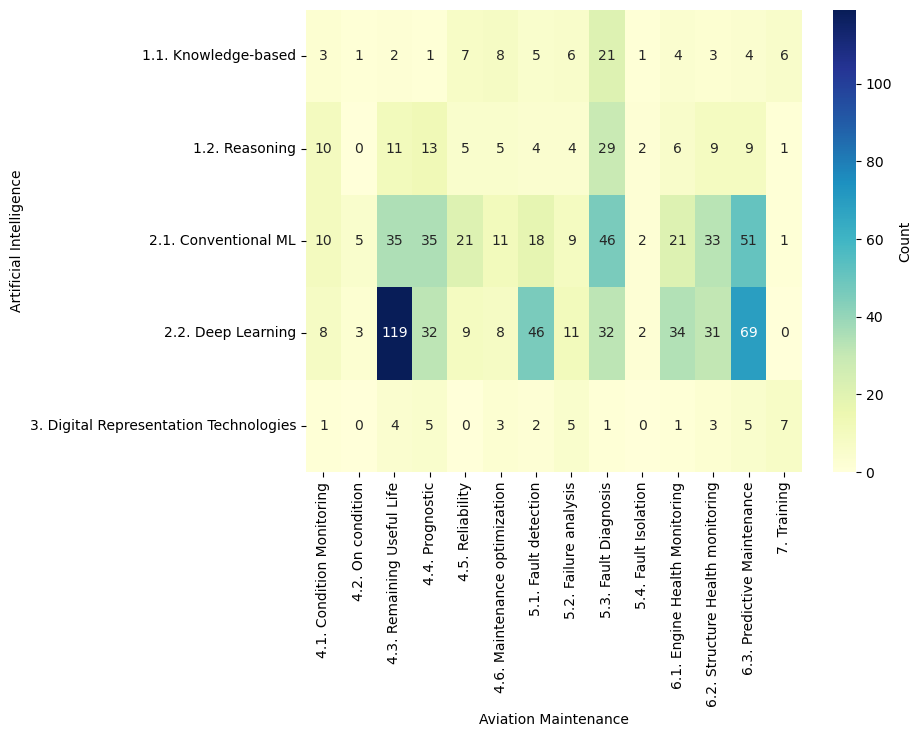

In [22]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt="g", cbar_kws={'label': 'Count'})
plt.xlabel("Aviation Maintenance")
plt.ylabel("Artificial Intelligence")
plt.show()

Crosstab with row and column shares

In [23]:
column_shares = crosstab.div(crosstab.sum(axis=0),axis=1) * 100
column_shares = column_shares.fillna(0)
row_shares = crosstab.div(crosstab.sum(axis=1),axis=0) * 100
row_shares = row_shares.fillna(0)

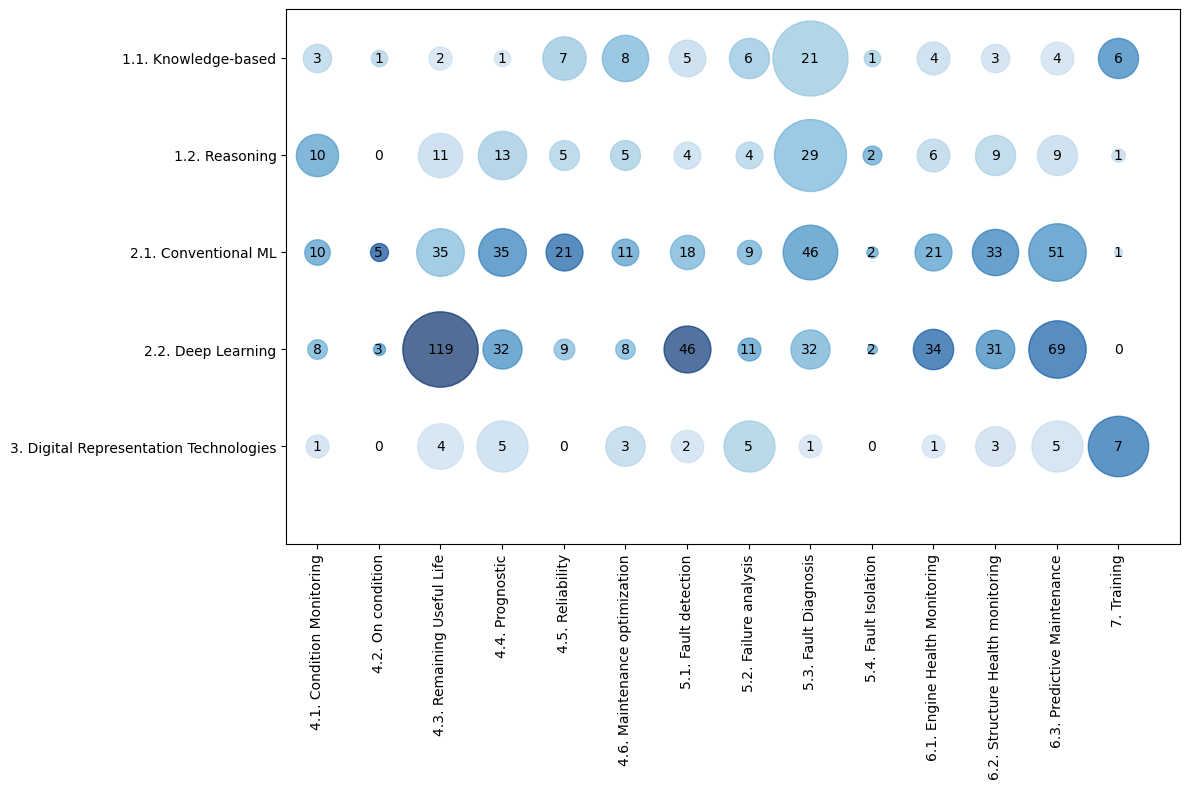

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(-0.5, crosstab.shape[1])
ax.set_ylim(-0.5, crosstab.shape[0]) 
for i in range(crosstab.shape[0]):
    for j in range(crosstab.shape[1]):
        value = crosstab.iloc[i, j]
        size = row_shares.iloc[i, j]*100
        color = 0.2+column_shares.iloc[i, j]/80
        ax.scatter(j, i, s=size, color=plt.cm.get_cmap('Blues')(color), alpha=0.7)
        ax.text(j, i, f"{value:.0f}", ha='center', va='center', color='black', fontsize=10)
ax.set_xticks(range(crosstab.shape[1]))
ax.set_yticks(range(crosstab.shape[0]))
ax.set_xticklabels(crosstab.columns, rotation=90)
ax.set_yticklabels(crosstab.index)
ax.invert_yaxis()
plt.subplots_adjust(top=0.9, bottom=0.2)
fig.tight_layout()
plt.show()